In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
# Loading and reading data
df = pd.read_csv(r'C:\Users\FILI DANI\Downloads\archive (12)\BankChurners.csv')

In [3]:
# Removal of unnecessary columns (last two columns)
df = df.iloc[:,1:21]

In [4]:
# Scaling the numerical variables via Robust scaler
for col in df.columns:
    if df[col].dtype != type(object):
        scaler = RobustScaler()
        df[col] = scaler.fit_transform(df[[col]])

In [5]:
# Handling categorical varibales (encoding)

# Encoding ordinal categorical columns
ordinal_categorical_columns = ['Education_Level','Income_Category','Card_Category']
def encoding_education_level(education_level):
    if education_level == 'Uneducated':
        return 0
    elif education_level == 'Unknown':
        return 1
    elif education_level == 'High School':
        return 2
    elif education_level == 'College':
        return 3
    elif education_level == 'Graduate':
        return 4
    elif education_level == 'Post-Graduate':
        return 5
    elif education_level == 'Doctorate':
        return 6
def encoding_income_category(income_category):
    if income_category == 'Unknown':
        return 0
    elif income_category == 'Less than $40K':
        return 1
    elif income_category == '$40K - $60K':
        return 2
    elif income_category == '$60K - $80K':
        return 3
    elif income_category == '$80K - $120K':
        return 4
    elif income_category == '$120K +':
        return 5
def encoding_card_category(card_category):
    if card_category == 'Blue':
        return 0
    elif card_category == 'Silver':
        return 1
    elif card_category == 'Gold':
        return 2
    elif card_category == 'Platinum':
        return 3
df['Education_Level'] = df['Education_Level'].apply(encoding_education_level)
df['Income_Category'] = df['Income_Category'].apply(encoding_income_category)
df['Card_Category'] = df['Card_Category'].apply(encoding_card_category)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x:1 if x=='Attrited Customer' else 0)

# Label ecoding (nominal categorical columsn)
for col in df.columns:
    if df[col].dtype == type(object):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [6]:
# Splitting the dataset
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
# Feature selection methods
anova_features = ['Customer_Age','Gender','Income_Category','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                  'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                  'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
chi2_features = ['Customer_Age','Gender','Income_Category','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                 'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                 'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
mutual_info_features = ['Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Total_Trans_Amt','Total_Amt_Chng_Q4_Q1',
                       'Avg_Open_To_Buy','Total_Revolving_Bal','Credit_Limit','Contacts_Count_12_mon','Months_Inactive_12_mon',
                       'Total_Relationship_Count','Months_on_book','Card_Category','Education_Level','Dependent_count']
sfs_logistic_regression_features = ['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status',
                                    'Income_Category','Card_Category','Months_on_book','Total_Relationship_Count',
                                    'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                                    'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
sfs_naive_bayes_features = ['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status','Months_on_book',
                            'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                            'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
sfs_svm_features = ['Customer_Age','Gender','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                    'Total_Revolving_Bal',
                    'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
sfs_decision_tree_features = ['Customer_Age','Months_on_book','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1',
                              'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
sfs_k_nearest_neighbor_features = ['Total_Relationship_Count','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                                   'Total_Trans_Ct']
sfs_random_forest_features = ['Gender','Income_Category','Total_Relationship_Count','Total_Revolving_Bal','Avg_Open_To_Buy',
                              'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
sfs_gradient_boosting_features = ['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status',
                                  'Income_Category','Card_Category','Months_on_book','Total_Relationship_Count',
                                  'Months_Inactive_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1',
                                  'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [8]:
# Logistic Regression
logistic_model = LogisticRegression()

# Fitting data (All features)
logistic_model.fit(x_train,y_train)

# Computing metrics
logistic_all_features_f1_score_train = f1_score(y_train,logistic_model.predict(x_train))
logistic_all_features_f1_score_test = f1_score(y_test,logistic_model.predict(x_test))

# Fitting data (Anova features)
logistic_model.fit(x_train.loc[:,anova_features],y_train)

# Computing metrics
logistic_anova_features_f1_score_train = f1_score(y_train,logistic_model.predict(x_train.loc[:,anova_features]))
logistic_anova_features_f1_score_test = f1_score(y_test,logistic_model.predict(x_test.loc[:,anova_features]))

# Fitting data (Chi2 features)
logistic_model.fit(x_train.loc[:,chi2_features],y_train)

# Computing metrics
logistic_chi2_features_f1_score_train = f1_score(y_train,logistic_model.predict(x_train.loc[:,chi2_features]))
logistic_chi2_features_f1_score_test = f1_score(y_test,logistic_model.predict(x_test.loc[:,chi2_features]))

# Fitting data (Mutual info features)
logistic_model.fit(x_train.loc[:,mutual_info_features],y_train)

# Computing metrics
logistic_mutual_info_features_f1_score_train = f1_score(y_train,logistic_model.predict(x_train.loc[:,mutual_info_features]))
logistic_mutual_info_features_f1_score_test = f1_score(y_test,logistic_model.predict(x_test.loc[:,mutual_info_features]))

# Fitting data (SFS logistic features)
logistic_model.fit(x_train.loc[:,sfs_logistic_regression_features],y_train)

# Computing metrics
logistic_sfs_features_f1_score_train = f1_score(y_train,logistic_model.predict(x_train.loc[:,sfs_logistic_regression_features]))
logistic_sfs_features_f1_score_test = f1_score(y_test,logistic_model.predict(x_test.loc[:,sfs_logistic_regression_features]))

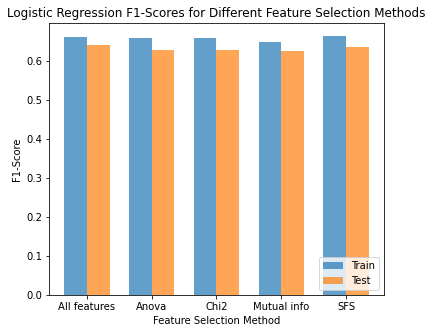

In [9]:
# Analyzing logistic model metrics
logistic_f1_train_scores = [logistic_all_features_f1_score_train,logistic_anova_features_f1_score_train,
                                  logistic_chi2_features_f1_score_train,
                                   logistic_mutual_info_features_f1_score_train,
                                   logistic_sfs_features_f1_score_train]
logistic_f1_test_scores = [logistic_all_features_f1_score_test,logistic_anova_features_f1_score_test,
                                 logistic_chi2_features_f1_score_test,logistic_mutual_info_features_f1_score_test,
                                  logistic_sfs_features_f1_score_test]
labels = ['All features','Anova','Chi2','Mutual info','SFS']

# Number of bars (groups)
num_bars = len(labels)

# Bar width
bar_width = 0.35

# X-axis positions for the bars
index = np.arange(num_bars)

# Plotting the bars
fig , ax = plt.subplots(figsize=(6,5))
ax.bar(index, logistic_f1_train_scores, width=bar_width, label='Training', alpha=0.7)
ax.bar(index + bar_width, logistic_f1_test_scores, width=bar_width, label='Testing', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Feature Selection Method')
ax.set_ylabel('F1-Score')
ax.set_title('Logistic Regression F1-Scores for Different Feature Selection Methods')
ax.set_xticks(index + bar_width / 2, labels)
plt.legend(['Train','Test'],loc='lower right')

# Show the plot
plt.show()

In [10]:
# Naive Bayes
naive_bayes_model = GaussianNB()

# Fitting data (All features)
naive_bayes_model.fit(x_train,y_train)

# Compute metrics
naive_bayes_all_features_f1_train_score = f1_score(y_train,naive_bayes_model.predict(x_train))
naive_bayes_all_features_f1_test_score = f1_score(y_test,naive_bayes_model.predict(x_test))

# Fitting data (Anova features)
naive_bayes_model.fit(x_train.loc[:,anova_features],y_train)

# Compute metrics
naive_bayes_anova_features_f1_train_score = f1_score(y_train,naive_bayes_model.predict(x_train.loc[:,anova_features]))
naive_bayes_anova_features_f1_test_score = f1_score(y_test,naive_bayes_model.predict(x_test.loc[:,anova_features]))

# Fitting data (Chi2 features)
naive_bayes_model.fit(x_train.loc[:,chi2_features],y_train)

# Compute metrics
naive_bayes_chi2_features_f1_train_score = f1_score(y_train,naive_bayes_model.predict(x_train.loc[:,chi2_features]))
naive_bayes_chi2_features_f1_test_score = f1_score(y_test,naive_bayes_model.predict(x_test.loc[:,chi2_features]))

# Fitting data (Mutual info features)
naive_bayes_model.fit(x_train.loc[:,mutual_info_features],y_train)

# Compute metrics
naive_bayes_mutual_info_features_f1_train_score = f1_score(y_train,naive_bayes_model.predict(x_train.loc[:,mutual_info_features]))
naive_bayes_mutual_info_features_f1_test_score = f1_score(y_test,naive_bayes_model.predict(x_test.loc[:,mutual_info_features]))

# Fitting data (SFS naive bayes)
naive_bayes_model.fit(x_train.loc[:,sfs_naive_bayes_features],y_train)

# Compute metrics
naive_bayes_sfs_features_f1_train_score = f1_score(y_train,naive_bayes_model.predict(x_train.loc[:,sfs_naive_bayes_features]))
naive_bayes_sfs_features_f1_test_score = f1_score(y_test,naive_bayes_model.predict(x_test.loc[:,sfs_naive_bayes_features]))

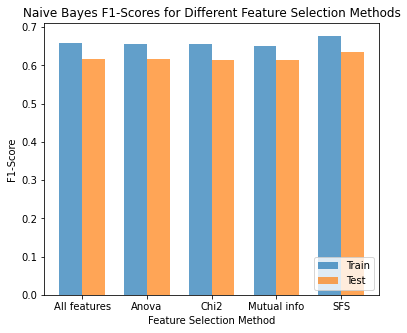

In [11]:
# Analyzing naive bayes model metrics
naive_bayes_f1_train_scores = [naive_bayes_all_features_f1_train_score,naive_bayes_anova_features_f1_train_score,
                                     naive_bayes_chi2_features_f1_train_score,naive_bayes_mutual_info_features_f1_train_score,
                                     naive_bayes_sfs_features_f1_train_score]
naive_bayes_f1_test_scores = [naive_bayes_all_features_f1_test_score,naive_bayes_anova_features_f1_test_score,
                                    naive_bayes_chi2_features_f1_test_score,naive_bayes_mutual_info_features_f1_test_score,
                                    naive_bayes_sfs_features_f1_test_score]

# Number of bars (groups)
num_bars = len(labels)

# Bar width
bar_width = 0.35

# X-axis positions for the bars
index = np.arange(num_bars)

# Plotting the bars
fig , ax = plt.subplots(figsize=(6,5))
ax.bar(index, naive_bayes_f1_train_scores, width=bar_width, label='Training', alpha=0.7)
ax.bar(index + bar_width, naive_bayes_f1_test_scores, width=bar_width, label='Testing', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Feature Selection Method')
ax.set_ylabel('F1-Score')
ax.set_title('Naive Bayes F1-Scores for Different Feature Selection Methods')
ax.set_xticks(index + bar_width / 2, labels)
plt.legend(['Train','Test'],loc='lower right')

# Show the plot
plt.show()

In [12]:
# Support vector machines
svm_model = SVC()

# Fitting data (All features)
svm_model.fit(x_train,y_train)

# Compute metrics
svm_all_features_f1_train_score = f1_score(y_train,svm_model.predict(x_train))
svm_all_features_f1_test_score = f1_score(y_test,svm_model.predict(x_test))
                                                         
# Fitting data (Anova features) 
svm_model.fit(x_train.loc[:,anova_features],y_train)

# Compute metrics 
svm_anova_features_f1_train_score = f1_score(y_train,svm_model.predict(x_train.loc[:,anova_features]))
svm_anova_features_f1_test_score = f1_score(y_test,svm_model.predict(x_test.loc[:,anova_features]))                                                        

# Fitting data (Chi2 features) 
svm_model.fit(x_train.loc[:,chi2_features],y_train) 
                                                           
# Compute metrics
svm_chi2_features_f1_train_score = f1_score(y_train,svm_model.predict(x_train.loc[:,chi2_features]))
svm_chi2_features_f1_test_score = f1_score(y_test,svm_model.predict(x_test.loc[:,chi2_features]))
                                                          
# Fitting data (Mutual info features)                                                          
svm_model.fit(x_train.loc[:,mutual_info_features],y_train)  
                                                          
# Compute metrics 
svm_mutual_info_features_f1_train_score = f1_score(y_train,svm_model.predict(x_train.loc[:,mutual_info_features]))
svm_mutual_info_features_f1_test_score = f1_score(y_test,svm_model.predict(x_test.loc[:,mutual_info_features])) 
                                                                
# Fitting data (sfs support vector machines features) 
svm_model.fit(x_train.loc[:,sfs_svm_features],y_train)     
                                                                 
# Compute metrics 
svm_sfs_features_f1_train_score = f1_score(y_train,svm_model.predict(x_train.loc[:,sfs_svm_features]))
svm_sfs_features_f1_test_score = f1_score(y_test,svm_model.predict(x_test.loc[:,sfs_svm_features]))                                                                

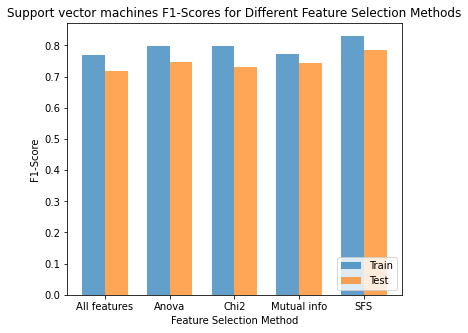

In [30]:
# Analyzing support vector machine model metrics
svm_f1_train_scores = [svm_all_features_f1_train_score,svm_anova_features_f1_train_score,
                       svm_chi2_features_f1_train_score,svm_mutual_info_features_f1_train_score,
                       svm_sfs_features_f1_train_score]
svm_f1_test_scores = [svm_all_features_f1_test_score,svm_anova_features_f1_test_score,
                       svm_chi2_features_f1_test_score,svm_mutual_info_features_f1_test_score,
                       svm_sfs_features_f1_test_score]

# Number of bars (groups)
num_bars = len(labels)

# Bar width
bar_width = 0.35

# X-axis positions for the bars
index = np.arange(num_bars)

# Plotting the bars
fig , ax = plt.subplots(figsize=(6,5))
ax.bar(index, svm_f1_train_scores, width=bar_width, label='Training', alpha=0.7)
ax.bar(index + bar_width, svm_f1_test_scores, width=bar_width, label='Testing', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Feature Selection Method')
ax.set_ylabel('F1-Score')
ax.set_title('Support vector machines F1-Scores for Different Feature Selection Methods')
ax.set_xticks(index + bar_width / 2, labels)
plt.legend(['Train','Test'],loc='lower right')

# Show the plot
plt.show()

In [14]:
# Decision trees 
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fitting data (All features)
decision_tree_model.fit(x_train,y_train)

# Compute metrics
decision_tree_all_features_f1_train_score = f1_score(y_train,decision_tree_model.predict(x_train))
decision_tree_all_features_f1_test_score = f1_score(y_test,decision_tree_model.predict(x_test))

# Fitting data (Anova features)
decision_tree_model.fit(x_train.loc[:,anova_features],y_train)

# Compute metrics
decision_tree_anova_features_f1_train_score = f1_score(y_train,decision_tree_model.predict(x_train.loc[:,anova_features]))
decision_tree_anova_features_f1_test_score = f1_score(y_test,decision_tree_model.predict(x_test.loc[:,anova_features]))

# Fitting data (Chi2 features)
decision_tree_model.fit(x_train.loc[:,chi2_features],y_train)

# Compute metrics
decision_tree_chi2_features_f1_train_score = f1_score(y_train,decision_tree_model.predict(x_train.loc[:,chi2_features]))
decision_tree_chi2_features_f1_test_score = f1_score(y_test,decision_tree_model.predict(x_test.loc[:,chi2_features]))

# Fitting data (Mutual info features)
decision_tree_model.fit(x_train.loc[:,mutual_info_features],y_train)

# Compute metrics
decision_tree_mutual_info_features_f1_train_score = f1_score(y_train,decision_tree_model.predict(x_train.loc[:,mutual_info_features]))
decision_tree_mutual_info_features_f1_test_score = f1_score(y_test,decision_tree_model.predict(x_test.loc[:,mutual_info_features]))

# Fitting data (SFS decision tree features)
decision_tree_model.fit(x_train.loc[:,sfs_decision_tree_features],y_train)

# Compute metrics
decision_tree_sfs_features_f1_train_score = f1_score(y_train,decision_tree_model.predict(x_train.loc[:,sfs_decision_tree_features]))
decision_tree_sfs_features_f1_test_score = f1_score(y_test,decision_tree_model.predict(x_test.loc[:,sfs_decision_tree_features]))

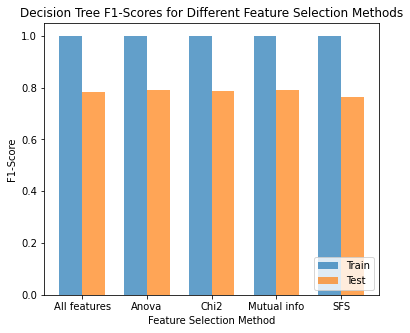

In [15]:
# Analyzing decision tree model metrics
decision_tree_f1_train_scores = [decision_tree_all_features_f1_train_score,decision_tree_anova_features_f1_train_score,
                                decision_tree_chi2_features_f1_train_score,decision_tree_mutual_info_features_f1_train_score,
                                decision_tree_sfs_features_f1_train_score]
decision_tree_f1_test_scores = [decision_tree_all_features_f1_test_score,decision_tree_anova_features_f1_test_score,
                                decision_tree_chi2_features_f1_test_score,decision_tree_mutual_info_features_f1_test_score,
                                decision_tree_sfs_features_f1_test_score]

# Number of bars (groups)
num_bars = len(labels)

# Bar width
bar_width = 0.35

# X-axis positions for the bars
index = np.arange(num_bars)

# Plotting the bars
fig , ax = plt.subplots(figsize=(6,5))
ax.bar(index, decision_tree_f1_train_scores, width=bar_width, label='Training', alpha=0.7)
ax.bar(index + bar_width, decision_tree_f1_test_scores, width=bar_width, label='Testing', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Feature Selection Method')
ax.set_ylabel('F1-Score')
ax.set_title('Decision Tree F1-Scores for Different Feature Selection Methods')
ax.set_xticks(index + bar_width / 2, labels)
plt.legend(['Train','Test'],loc='lower right')

# Show the plot
plt.show()

In [16]:
# K-nearest neighbor
number_of_neighbors = [3,6,9,12,15,18]

# All features
k_nearest_neighbor_all_features_f1_train_scores = []
k_nearest_neighbor_all_features_f1_test_scores = []
for neighbor in number_of_neighbors:
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski',p=2)
    k_nearest_neighbor_model.fit(x_train,y_train)
    k_nearest_neighbor_all_features_f1_train_scores.append(f1_score(y_train,k_nearest_neighbor_model.predict(x_train)))
    k_nearest_neighbor_all_features_f1_test_scores.append(f1_score(y_test,k_nearest_neighbor_model.predict(x_test)))

# Anova features
k_nearest_neighbor_anova_features_f1_train_scores = []
k_nearest_neighbor_anova_features_f1_test_scores = []
for neighbor in number_of_neighbors:
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski',p=2)
    k_nearest_neighbor_model.fit(x_train.loc[:,anova_features],y_train)
    k_nearest_neighbor_anova_features_f1_train_scores.append(f1_score(y_train,k_nearest_neighbor_model.predict(x_train.loc[:,anova_features])))
    k_nearest_neighbor_anova_features_f1_test_scores.append(f1_score(y_test,k_nearest_neighbor_model.predict(x_test.loc[:,anova_features])))
    
# Chi2 features
k_nearest_neighbor_chi2_features_f1_train_scores = []
k_nearest_neighbor_chi2_features_f1_test_scores = []
for neighbor in number_of_neighbors:
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski',p=2)
    k_nearest_neighbor_model.fit(x_train.loc[:,chi2_features],y_train)
    k_nearest_neighbor_chi2_features_f1_train_scores.append(f1_score(y_train,k_nearest_neighbor_model.predict(x_train.loc[:,chi2_features])))
    k_nearest_neighbor_chi2_features_f1_test_scores.append(f1_score(y_test,k_nearest_neighbor_model.predict(x_test.loc[:,chi2_features])))

# Mutual info features
k_nearest_neighbor_mutual_info_features_f1_train_scores = []
k_nearest_neighbor_mutual_info_features_f1_test_scores = []
for neighbor in number_of_neighbors:
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski',p=2)
    k_nearest_neighbor_model.fit(x_train.loc[:,mutual_info_features],y_train)
    k_nearest_neighbor_mutual_info_features_f1_train_scores.append(f1_score(y_train,k_nearest_neighbor_model.predict(x_train.loc[:,mutual_info_features])))
    k_nearest_neighbor_mutual_info_features_f1_test_scores.append(f1_score(y_test,k_nearest_neighbor_model.predict(x_test.loc[:,mutual_info_features])))

# SFS K_nearest_neighbors features
k_nearest_neighbor_sfs_features_f1_train_scores = []
k_nearest_neighbor_sfs_features_f1_test_scores = []
for neighbor in number_of_neighbors:
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski',p=2)
    k_nearest_neighbor_model.fit(x_train.loc[:,sfs_k_nearest_neighbor_features],y_train)
    k_nearest_neighbor_sfs_features_f1_train_scores.append(f1_score(y_train,k_nearest_neighbor_model.predict(x_train.loc[:,sfs_k_nearest_neighbor_features]))) 
    k_nearest_neighbor_sfs_features_f1_test_scores.append(f1_score(y_test,k_nearest_neighbor_model.predict(x_test.loc[:,sfs_k_nearest_neighbor_features])))  

# Compute metrics
k_nearest_neighbor_f1_train_scores = [max(k_nearest_neighbor_all_features_f1_train_scores),
                                             max(k_nearest_neighbor_anova_features_f1_train_scores),
                                             max(k_nearest_neighbor_chi2_features_f1_train_scores),
                                             max(k_nearest_neighbor_mutual_info_features_f1_train_scores),
                                             max(k_nearest_neighbor_sfs_features_f1_train_scores)]
k_nearest_neighbor_f1_test_scores = [max(k_nearest_neighbor_all_features_f1_test_scores),
                                            max(k_nearest_neighbor_anova_features_f1_test_scores),
                                            max(k_nearest_neighbor_chi2_features_f1_test_scores),
                                            max(k_nearest_neighbor_mutual_info_features_f1_test_scores),
                                            max(k_nearest_neighbor_sfs_features_f1_test_scores)]

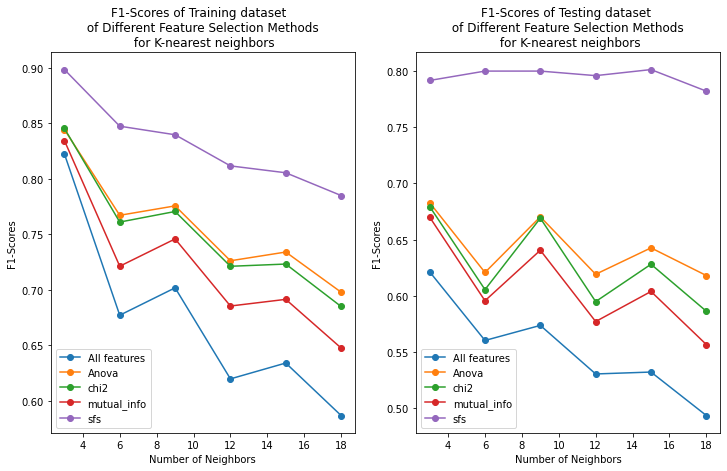

In [17]:
# Analyzing K-nearest neighbors model metrics
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,7))
ax1.plot(number_of_neighbors,k_nearest_neighbor_all_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_neighbors,k_nearest_neighbor_anova_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_neighbors,k_nearest_neighbor_chi2_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_neighbors,k_nearest_neighbor_mutual_info_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_neighbors,k_nearest_neighbor_sfs_features_f1_train_scores,linestyle='-',marker='o')
ax2.plot(number_of_neighbors,k_nearest_neighbor_all_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_neighbors,k_nearest_neighbor_anova_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_neighbors,k_nearest_neighbor_chi2_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_neighbors,k_nearest_neighbor_mutual_info_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_neighbors,k_nearest_neighbor_sfs_features_f1_test_scores,linestyle='-',marker='o')
ax1.set_title('F1-Scores of Training dataset  \n of Different Feature Selection Methods \n for K-nearest neighbors')
ax2.set_title('F1-Scores of Testing dataset \n of Different Feature Selection Methods \n for K-nearest neighbors')
ax1.set_xlabel('Number of Neighbors')
ax2.set_xlabel('Number of Neighbors')
ax1.set_ylabel('F1-Scores')
ax2.set_ylabel('F1-Scores')
ax1.legend(['All features','Anova','chi2','mutual_info','sfs'],loc='lower left')
ax2.legend(['All features','Anova','chi2','mutual_info','sfs'],loc='lower left')
plt.show()

In [18]:
# Random forest 
number_of_estimators = [10,20,30,40,50,60]

# All features
random_forest_all_features_f1_train_scores = []
random_forest_all_features_f1_test_scores = []
for estimator in number_of_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    random_forest_model.fit(x_train,y_train)
    random_forest_all_features_f1_train_scores.append(f1_score(y_train,random_forest_model.predict(x_train)))
    random_forest_all_features_f1_test_scores.append(f1_score(y_test,random_forest_model.predict(x_test)))

# Anova features
random_forest_anova_features_f1_train_scores = []
random_forest_anova_features_f1_test_scores = []
for estmator in number_of_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    random_forest_model.fit(x_train.loc[:,anova_features],y_train)
    random_forest_anova_features_f1_train_scores.append(f1_score(y_train,random_forest_model.predict(x_train.loc[:,anova_features])))
    random_forest_anova_features_f1_test_scores.append(f1_score(y_test,random_forest_model.predict(x_test.loc[:,anova_features])))

# Chi2 features
random_forest_chi2_features_f1_train_scores = []
random_forest_chi2_features_f1_test_scores = []
for estimator in number_of_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    random_forest_model.fit(x_train.loc[:,chi2_features],y_train)
    random_forest_chi2_features_f1_train_scores.append(f1_score(y_train,random_forest_model.predict(x_train.loc[:,chi2_features])))
    random_forest_chi2_features_f1_test_scores.append(f1_score(y_test,random_forest_model.predict(x_test.loc[:,chi2_features])))

# Mutual info features
random_forest_mutual_info_features_f1_train_scores = []
random_forest_mutual_info_features_f1_test_scores = []
for estimator in number_of_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    random_forest_model.fit(x_train.loc[:,mutual_info_features],y_train)
    random_forest_mutual_info_features_f1_train_scores.append(f1_score(y_train,random_forest_model.predict(x_train.loc[:,mutual_info_features])))
    random_forest_mutual_info_features_f1_test_scores.append(f1_score(y_test,random_forest_model.predict(x_test.loc[:,mutual_info_features])))

# SFS random forest features
random_forest_sfs_features_f1_train_scores = []
random_forest_sfs_features_f1_test_scores = []
for estimator in number_of_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    random_forest_model.fit(x_train.loc[:,sfs_random_forest_features],y_train)
    random_forest_sfs_features_f1_train_scores.append(f1_score(y_train,random_forest_model.predict(x_train.loc[:,sfs_random_forest_features])))
    random_forest_sfs_features_f1_test_scores.append(f1_score(y_test,random_forest_model.predict(x_test.loc[:,sfs_random_forest_features])))

# Compute metrics
random_forest_f1_train_scores = [max(random_forest_all_features_f1_train_scores),
                                       max(random_forest_anova_features_f1_train_scores),
                                       max(random_forest_chi2_features_f1_train_scores),
                                       max(random_forest_mutual_info_features_f1_train_scores),
                                       max(random_forest_sfs_features_f1_train_scores)]
random_forest_f1_test_scores = [max(random_forest_all_features_f1_test_scores),
                                      max(random_forest_anova_features_f1_test_scores),
                                      max(random_forest_chi2_features_f1_test_scores),
                                      max(random_forest_mutual_info_features_f1_test_scores),
                                      max(random_forest_sfs_features_f1_test_scores)]

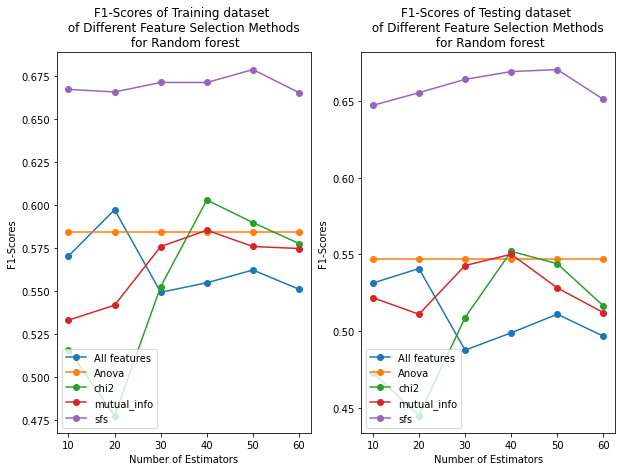

In [19]:
# Analyzing Random forest model metrics
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.plot(number_of_estimators,random_forest_all_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,random_forest_anova_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,random_forest_chi2_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,random_forest_mutual_info_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,random_forest_sfs_features_f1_train_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,random_forest_all_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,random_forest_anova_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,random_forest_chi2_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,random_forest_mutual_info_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,random_forest_sfs_features_f1_test_scores,linestyle='-',marker='o')
ax1.set_title('F1-Scores of Training dataset \n of Different Feature Selection Methods \n for Random forest')
ax2.set_title('F1-Scores of Testing dataset \n of Different Feature Selection Methods \n for Random forest')
ax1.set_xlabel('Number of Estimators')
ax2.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Scores')
ax2.set_ylabel('F1-Scores')
ax1.legend(['All features','Anova','chi2','mutual_info','sfs'],loc='lower left')
ax2.legend(['All features','Anova','chi2','mutual_info','sfs'],loc='lower left')
plt.show()

In [20]:
# Gradient boosting

# All features
gradient_boosting_all_features_f1_train_scores = []
gradient_boosting_all_features_f1_test_scores = []
for estimator in number_of_estimators:
    gradient_boosting_model = GradientBoostingClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    gradient_boosting_model.fit(x_train,y_train)
    gradient_boosting_all_features_f1_train_scores.append(f1_score(y_train,gradient_boosting_model.predict(x_train)))
    gradient_boosting_all_features_f1_test_scores.append(f1_score(y_test,gradient_boosting_model.predict(x_test)))

# Anova features
gradient_boosting_anova_features_f1_train_scores = []
gradient_boosting_anova_features_f1_test_scores = []
for estimator in number_of_estimators:
    gradient_boosting_model = GradientBoostingClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    gradient_boosting_model.fit(x_train.loc[:,anova_features],y_train)
    gradient_boosting_anova_features_f1_train_scores.append(f1_score(y_train,gradient_boosting_model.predict(x_train.loc[:,anova_features])))
    gradient_boosting_anova_features_f1_test_scores.append(f1_score(y_test,gradient_boosting_model.predict(x_test.loc[:,anova_features])))

# Chi2 features
gradient_boosting_chi2_features_f1_train_scores = []
gradient_boosting_chi2_features_f1_test_scores = []
for estimator in number_of_estimators:
    gradient_boosting_model = GradientBoostingClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    gradient_boosting_model.fit(x_train.loc[:,chi2_features],y_train)
    gradient_boosting_chi2_features_f1_train_scores.append(f1_score(y_train,gradient_boosting_model.predict(x_train.loc[:,chi2_features])))
    gradient_boosting_chi2_features_f1_test_scores.append(f1_score(y_test,gradient_boosting_model.predict(x_test.loc[:,chi2_features])))
    
# Mutual info features
gradient_boosting_mutual_info_features_f1_train_scores = []
gradient_boosting_mutual_info_features_f1_test_scores = []
for estimator in number_of_estimators:
    gradient_boosting_model = GradientBoostingClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    gradient_boosting_model.fit(x_train.loc[:,mutual_info_features],y_train)
    gradient_boosting_mutual_info_features_f1_train_scores.append(f1_score(y_train,gradient_boosting_model.predict(x_train.loc[:,mutual_info_features])))
    gradient_boosting_mutual_info_features_f1_test_scores.append(f1_score(y_test,gradient_boosting_model.predict(x_test.loc[:,mutual_info_features])))

# SFS gradient boosting features
gradient_boosting_sfs_features_f1_train_scores = []
gradient_boosting_sfs_features_f1_test_scores = []
for estimator in number_of_estimators:
    gradient_boosting_model = GradientBoostingClassifier(n_estimators=estimator,max_depth=3,random_state=42)
    gradient_boosting_model.fit(x_train.loc[:,sfs_gradient_boosting_features],y_train)
    gradient_boosting_sfs_features_f1_train_scores.append(f1_score(y_train,gradient_boosting_model.predict(x_train.loc[:,sfs_gradient_boosting_features])))
    gradient_boosting_sfs_features_f1_test_scores.append(f1_score(y_test,gradient_boosting_model.predict(x_test.loc[:,sfs_gradient_boosting_features])))

# Compute metrics
gradient_boosting_f1_train_scores = [max(gradient_boosting_all_features_f1_train_scores),
                                           max(gradient_boosting_anova_features_f1_train_scores),
                                           max(gradient_boosting_chi2_features_f1_train_scores),
                                           max(gradient_boosting_mutual_info_features_f1_train_scores),
                                           max(gradient_boosting_sfs_features_f1_train_scores)]
gradient_boosting_f1_test_scores = [max(gradient_boosting_all_features_f1_test_scores),
                                          max(gradient_boosting_anova_features_f1_test_scores),
                                          max(gradient_boosting_chi2_features_f1_test_scores),
                                          max(gradient_boosting_mutual_info_features_f1_test_scores),
                                          max(gradient_boosting_sfs_features_f1_test_scores)]

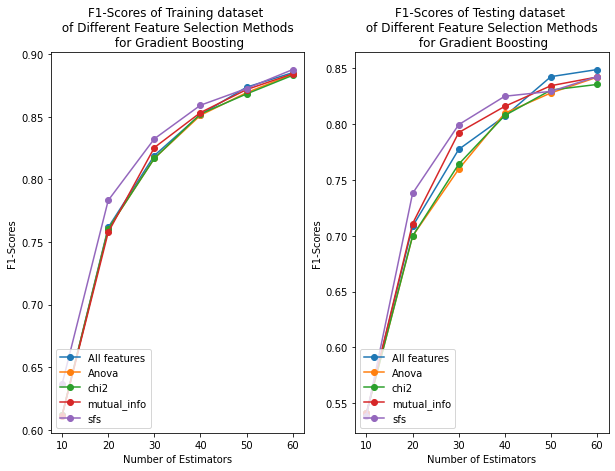

In [21]:
# Analyzing Gradient boosting model metrics
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.plot(number_of_estimators,gradient_boosting_all_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,gradient_boosting_anova_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,gradient_boosting_chi2_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,gradient_boosting_mutual_info_features_f1_train_scores,linestyle='-',marker='o')
ax1.plot(number_of_estimators,gradient_boosting_sfs_features_f1_train_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,gradient_boosting_all_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,gradient_boosting_anova_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,gradient_boosting_chi2_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,gradient_boosting_mutual_info_features_f1_test_scores,linestyle='-',marker='o')
ax2.plot(number_of_estimators,gradient_boosting_sfs_features_f1_test_scores,linestyle='-',marker='o')
ax1.set_title('F1-Scores of Training dataset \n of Different Feature Selection Methods \n for Gradient Boosting')
ax2.set_title('F1-Scores of Testing dataset \n of Different Feature Selection Methods \n for Gradient Boosting')
ax1.set_xlabel('Number of Estimators')
ax2.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Scores')
ax2.set_ylabel('F1-Scores')
ax1.legend(['All features','Anova','chi2','mutual_info','sfs'],loc='lower left')
ax2.legend(['All features','Anova','chi2','mutual_info','sfs'],loc='lower left')
plt.show()

In [22]:
# Identifying best features for each algorithm 

# Logistic regression 
print(f'Testing f1-scores achieved for logistic regression are \n {logistic_f1_test_scores} \n Highest f1-score achieved {max(logistic_f1_test_scores)} \n The best features to use are {labels[logistic_f1_test_scores.index(max(logistic_f1_test_scores))]} \n')

# Naive Bayes
print(f'Testing f1-scores achieved for naive bayes are \n {naive_bayes_f1_test_scores} \n Highest f1-score achieved {max(naive_bayes_f1_test_scores)} \n The best features to use are {labels[naive_bayes_f1_test_scores.index(max(naive_bayes_f1_test_scores))]} \n')

# Support vector machines
print(f'Testing f1-scores achieved for support vector machines are \n {svm_f1_test_scores} \n Highest f1-score achieved {max(svm_f1_test_scores)} \n The best features to use are {labels[svm_f1_test_scores.index(max(svm_f1_test_scores))]} \n')

# Decision trees
print(f'Testing f1-scores achieved for decision trees are \n {decision_tree_f1_test_scores} \n Highest f1-score achieved {max(decision_tree_f1_test_scores)} \n The best features to use are {labels[decision_tree_f1_test_scores.index(max(decision_tree_f1_test_scores))]} \n')

# K-nearest neighbor
print(f'Testing f1-scores achieved for k-nearest neighbor are \n {k_nearest_neighbor_f1_test_scores} \n Highest f1-score achieved {max(k_nearest_neighbor_f1_test_scores)} \n The best features to use are {labels[k_nearest_neighbor_f1_test_scores.index(max(k_nearest_neighbor_f1_test_scores))]} \n')

# Random forest
print(f'Testing f1-scores achieved for random forest are \n {random_forest_f1_test_scores} \n Highest f1-score achieved {max(random_forest_f1_test_scores)} \n The best features to use are {labels[random_forest_f1_test_scores.index(max(random_forest_f1_test_scores))]} \n')

# Gradient boosting
print(f'Testing f1-scores achieved for gradient boosting are \n {gradient_boosting_f1_test_scores} \n Highest f1-score achieved {max(gradient_boosting_f1_test_scores)} \n The best features to use are {labels[gradient_boosting_f1_test_scores.index(max(gradient_boosting_f1_test_scores))]} \n')

Testing f1-scores achieved for logistic regression are 
 [0.640144665461121, 0.6265938069216758, 0.6265938069216758, 0.6261180679785332, 0.6340579710144927] 
 Highest f1-score achieved 0.640144665461121 
 The best features to use are All features 

Testing f1-scores achieved for naive bayes are 
 [0.6163522012578615, 0.6153846153846153, 0.6132075471698114, 0.613953488372093, 0.6345256609642301] 
 Highest f1-score achieved 0.6345256609642301 
 The best features to use are SFS 

Testing f1-scores achieved for support vector machines are 
 [0.7178571428571429, 0.745644599303136, 0.7323943661971831, 0.7451669595782073, 0.787052810902896] 
 Highest f1-score achieved 0.787052810902896 
 The best features to use are SFS 

Testing f1-scores achieved for decision trees are 
 [0.783151326053042, 0.7896341463414634, 0.7870370370370371, 0.7919254658385094, 0.7636932707355243] 
 Highest f1-score achieved 0.7919254658385094 
 The best features to use are Mutual info 

Testing f1-scores achieved for 

Evaluation

In [23]:
# Evaluation of the models
df_evaluation_of_models = pd.DataFrame({'Algorithms':['Logistic regression','Naive bayes','Support vector machines',
                                                      'Decision trees','K-nearest neighbor',
                                                      'Random forest','Gradient boosting'],
                                       'Training f1-scores':[logistic_f1_train_scores[logistic_f1_test_scores.index(max(logistic_f1_test_scores))],
                                       naive_bayes_f1_train_scores[naive_bayes_f1_test_scores.index(max(naive_bayes_f1_test_scores))],
                                       svm_f1_train_scores[svm_f1_test_scores.index(max(svm_f1_test_scores))],
                                       decision_tree_f1_train_scores[decision_tree_f1_test_scores.index(max(decision_tree_f1_test_scores))],
                                       k_nearest_neighbor_sfs_features_f1_train_scores[4],random_forest_f1_train_scores[random_forest_f1_test_scores.index(max(random_forest_f1_test_scores))],
                                       gradient_boosting_f1_train_scores[gradient_boosting_f1_test_scores.index(max(gradient_boosting_f1_test_scores))]],
                                       'Testing f1-scores':[max(logistic_f1_test_scores),max(naive_bayes_f1_test_scores),max(svm_f1_test_scores),
                                                        max(decision_tree_f1_test_scores),max(k_nearest_neighbor_f1_test_scores),
                                                         max(random_forest_f1_test_scores),max(gradient_boosting_f1_test_scores)],
                                       'Best features':[labels[logistic_f1_test_scores.index(max(logistic_f1_test_scores))],
                                                       labels[naive_bayes_f1_test_scores.index(max(naive_bayes_f1_test_scores))],
                                                       labels[svm_f1_test_scores.index(max(svm_f1_test_scores))],
                                                       labels[decision_tree_f1_test_scores.index(max(decision_tree_f1_test_scores))],
                                                       labels[k_nearest_neighbor_f1_test_scores.index(max(k_nearest_neighbor_f1_test_scores))],
                                                       labels[random_forest_f1_test_scores.index(max(random_forest_f1_test_scores))],
                                                       labels[gradient_boosting_f1_test_scores.index(max(gradient_boosting_f1_test_scores))]]
                                       })


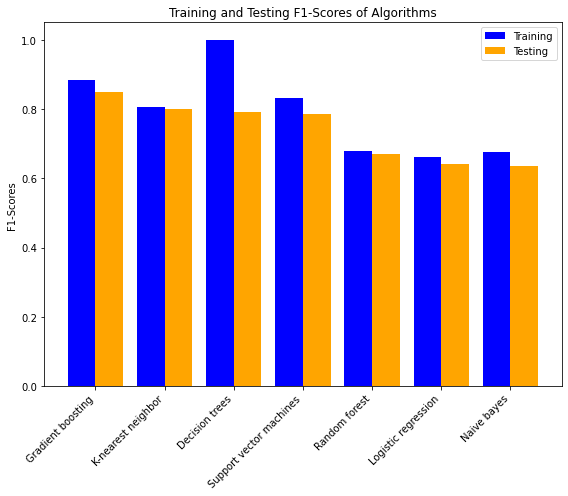

In [24]:
# Sort the DataFrame by testing precision scores
df_evaluation_of_models = df_evaluation_of_models.sort_values(by='Testing f1-scores', ascending=False)

# Set the figure size
plt.figure(figsize=(8,7))

# Create an array for the bar positions
bar_positions = np.arange(len(df_evaluation_of_models))

# Plot the training precision scores
plt.bar(bar_positions - 0.2, df_evaluation_of_models['Training f1-scores'], width=0.4, label='Training', color='blue')

# Plot the testing precision scores
plt.bar(bar_positions + 0.2, df_evaluation_of_models['Testing f1-scores'], width=0.4, label='Testing', color='orange')

# Set x-axis ticks and labels
plt.xticks(bar_positions, df_evaluation_of_models['Algorithms'], rotation=45, ha='right')

# Set labels and title
plt.ylabel('F1-Scores')
plt.title('Training and Testing F1-Scores of Algorithms')

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
df_evaluation_of_models

,Algorithms,Training f1-scores,Testing f1-scores,Best features
6,Gradient boosting,0.885057,0.848586,All features
4,K-nearest neighbor,0.805441,0.801347,SFS
3,Decision trees,1.000000,0.791925,Mutual info
2,Support vector machines,0.830642,0.787053,SFS
5,Random forest,0.678788,0.670498,SFS
0,Logistic regression,0.661128,0.640145,All features
1,Naive bayes,0.676783,0.634526,SFS


In [26]:
# Best model 
df = pd.read_csv(r'C:\Users\FILI DANI\Downloads\archive (12)\BankChurners.csv')

# Removal of unnecessary columns (last two columns)
df = df.iloc[:,1:21]

# Handling categorical varibales (encoding)

# Encoding ordinal categorical columns
ordinal_categorical_columns = ['Education_Level','Income_Category','Card_Category']
def encoding_education_level(education_level):
    if education_level == 'Uneducated':
        return 0
    elif education_level == 'Unknown':
        return 1
    elif education_level == 'High School':
        return 2
    elif education_level == 'College':
        return 3
    elif education_level == 'Graduate':
        return 4
    elif education_level == 'Post-Graduate':
        return 5
    elif education_level == 'Doctorate':
        return 6
def encoding_income_category(income_category):
    if income_category == 'Unknown':
        return 0
    elif income_category == 'Less than $40K':
        return 1
    elif income_category == '$40K - $60K':
        return 2
    elif income_category == '$60K - $80K':
        return 3
    elif income_category == '$80K - $120K':
        return 4
    elif income_category == '$120K +':
        return 5
def encoding_card_category(card_category):
    if card_category == 'Blue':
        return 0
    elif card_category == 'Silver':
        return 1
    elif card_category == 'Gold':
        return 2
    elif card_category == 'Platinum':
        return 3
df['Education_Level'] = df['Education_Level'].apply(encoding_education_level)
df['Income_Category'] = df['Income_Category'].apply(encoding_income_category)
df['Card_Category'] = df['Card_Category'].apply(encoding_card_category)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x:1 if x=='Attrited Customer' else 0)

# Label ecoding (nominal categorical columsn)
for col in df.columns:
    if df[col].dtype == type(object):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
best_model = GradientBoostingClassifier(n_estimators=60,max_depth=3,random_state=42)
best_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=60, random_state=42)

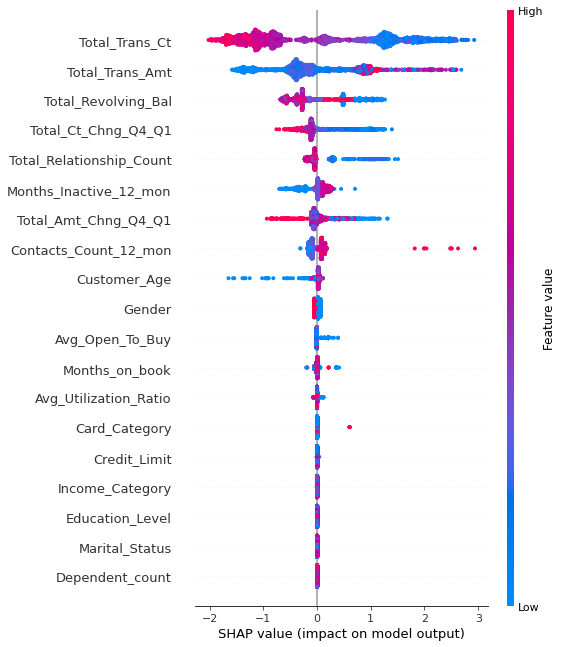

In [29]:
import shap
e = shap.Explainer(best_model)
v = e.shap_values(x_test)
shap.summary_plot(v,x_test)

In [47]:
import pickle
pickle.dump(best_model,open('model.pkl','wb'))